In [8]:
import pandas as pd
import os 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
data_year = 2017
fire_df = pd.read_csv("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/yearly_raw_data/VIIRS_{}_all.csv".format(data_year))
fire_df.head()

,Unnamed: 0,id,lon,lat,date,time,brightness,confidence
0,0,188959,120.53938,28.85115,2017/3/1,400,341.5,nominal
1,1,188960,121.81626,39.65147,2017/3/1,400,338.1,nominal
2,2,188961,117.80023,39.28128,2017/3/1,400,330.8,nominal
3,3,188962,117.61832,39.22391,2017/3/1,400,333.6,nominal
4,4,188963,116.05602,39.12785,2017/3/1,400,328.7,nominal


In [10]:
geometry = gpd.points_from_xy(fire_df.loc[:,"lon"], fire_df.loc[:,"lat"])
fire_points = gpd.GeoDataFrame(
    fire_df[["id", "date", "time", "brightness", "confidence"]], geometry=geometry
)

fire_points.head()
len(fire_points)

3933525

In [11]:
study_area = gpd.read_file("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/county_cities_filtered(interaction).gpkg")
study_area = study_area.to_crs("EPSG:4326")
study_area.head()


,AD2004,NAME2004,SHENG,Count_,Sum_总人口,Sum_男,Sum_女,Sum_户籍人,Sum_少数民,Sum_非农人,...,Sum_出生人,Sum_死亡人,Sum_总受教,Sum_男受_1,Sum_女受_1,Sum_GDP201,常住减户籍,面积,人口密度,geometry
0,610116,长安区,陕西省,1,1083285.0,547062.0,536223.0,977513.0,6499.7100,240814.2555,...,100745.5050,41598.1440,11439489.60,5869975.26,5571356.97,274.410,105772,1598.214728,677.809421,"MULTIPOLYGON (((109.22460 33.87748, 109.21729 ..."
1,610125,户县,陕西省,1,556377.0,287369.0,269008.0,572282.0,834.5655,96420.1341,...,52076.8872,33215.7069,5324527.89,2873690.00,2453352.96,105.780,-15905,1276.696955,435.794100,"MULTIPOLYGON (((108.76184 33.95985, 108.76421 ..."
2,610124,周至县,陕西省,1,562768.0,291651.0,271117.0,662657.0,450.2144,57683.7200,...,69501.8480,33147.0352,4907336.96,2721103.83,2193336.53,53.160,-99889,2972.254795,189.340430,"MULTIPOLYGON (((108.44716 34.08542, 108.45443 ..."
3,611026,柞水县,陕西省,1,153398.0,82177.0,71221.0,156879.0,260.7766,21521.7394,...,14035.9170,11075.3356,1217980.12,693573.88,523474.35,29.974,-3481,2339.913722,65.557118,"MULTIPOLYGON (((109.59655 33.67462, 109.58577 ..."
4,610923,宁陕县,陕西省,1,70435.0,38345.0,32090.0,73106.0,2542.7035,12009.1675,...,5916.5400,4754.3625,567001.75,317113.15,249660.20,11.612,-2671,3640.915536,19.345409,"MULTIPOLYGON (((108.63221 33.15357, 108.62495 ..."


/Users/zwy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2233: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


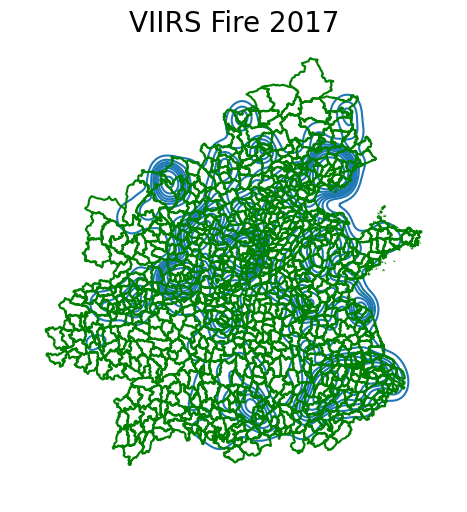

In [12]:
import geoplot
fire_clipped = fire_points.clip(study_area)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
ax = geoplot.kdeplot(fire_clipped)
study_area.boundary.plot(ax=ax, color="green")
ax.set_title("VIIRS Fire 2017", fontsize=20)
ax.set_axis_off()
plt.show()

In [13]:
len(fire_clipped)

506817

In [14]:
fire_clipped.to_csv("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/VIIRS_{}_clipped.csv".format(data_year))